In [8]:
ls

Breast_Cancer/  Untitled.ipynb


In [10]:
ls Breast_Cancer


10X/  Alex/


# Top 20% predictable genes

## 10X

In [15]:
import os
import pandas as pd

res = os.listdir("./Breast_Cancer/10X/")
df = [pd.read_csv("./Breast_Cancer/10X/"+i, index_col=[0]) for i in res]
df = pd.concat(df)
df
    

,Pearson correlation,Gene,Slide,Method
ISG15,0.070338,ISG15,block1,Hist2ST
PLA2G2D,0.128043,PLA2G2D,block1,Hist2ST
CAMK2N1,0.179457,CAMK2N1,block1,Hist2ST
USP48,0.092823,USP48,block1,Hist2ST
TCEA3,0.214552,TCEA3,block1,Hist2ST
...,...,...,...,...
CYBB,0.122041,CYBB,block2,Hist2ST
ITM2A,0.100643,ITM2A,block2,Hist2ST
SH3BGRL,0.239077,SH3BGRL,block2,Hist2ST
BEX3,0.210675,BEX3,block2,Hist2ST


In [24]:
import pandas as pd

# Group by 'Slide'
grouped = df.groupby('Slide')

# Find top 20% genes for each slide based on Pearson correlation
result = pd.DataFrame()
top_genes_per_slide = []
for name, group in grouped:
    # Sort genes based on Pearson correlation
    sorted_genes = group.sort_values(by='Pearson correlation', ascending=False)

    # Calculate the index to select the top 20%
    top_20_percent_index = int(0.2 * len(sorted_genes))

    # Select top 20% genes
    top_20_percent_genes = sorted_genes.head(top_20_percent_index)

    # Append the result to the final DataFrame
    result = pd.concat([result, top_20_percent_genes])
    
    # Append the top genes for this slide to the list
    top_genes_per_slide.append(set(top_20_percent_genes['Gene']))

# Find the intersection of top genes across all slides
intersection_genes = set.intersection(*top_genes_per_slide)

# Display the intersection genes
print(f"There are {len(intersection_genes)} predictable genes across Alex and 10x datasets.\nIntersection of Top Genes Across Slides:\n{list(intersection_genes)}")

# Display the result
result


There are 17 predictable genes across Alex and 10x datasets.
Intersection of Top Genes Across Slides:
['CPNE3', 'TOP2A', 'KCTD3', 'PFN2', 'NPNT', 'MLLT6', 'CCL19', 'NAA20', 'PTPRF', 'TCEA3', 'GTF3C6', 'HIST1H2BD', 'INTS8', 'CREB3L4', 'MYO6', 'PSMB2', 'NEBL']


,Pearson correlation,Gene,Slide,Method
PPP1R1B,0.310888,PPP1R1B,FFPE,Hist2ST
PPP1R1A,0.294287,PPP1R1A,FFPE,Hist2ST
CCL19,0.276856,CCL19,FFPE,Hist2ST
TRBC2,0.271768,TRBC2,FFPE,Hist2ST
IFI6,0.269015,IFI6,FFPE,Hist2ST
...,...,...,...,...
CPD,0.222698,CPD,block2,Hist2ST
PSME3,0.222623,PSME3,block2,Hist2ST
CPNE3,0.221908,CPNE3,block2,Hist2ST
SNRPA1,0.221004,SNRPA1,block2,Hist2ST


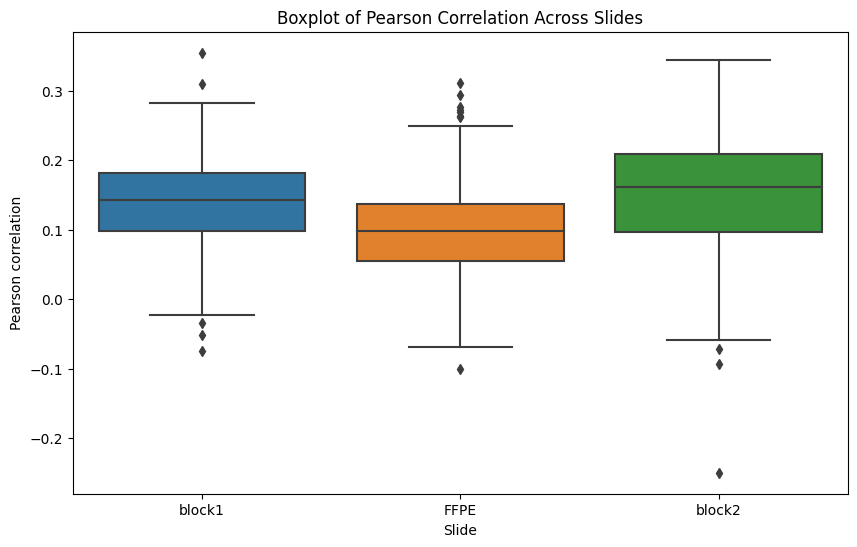

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

plt.figure(figsize=(10, 6))
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides')
gc.collect()
plt.show()

## Alex

In [34]:
import os
import pandas as pd

res = os.listdir("./Breast_Cancer/Alex/")
df = [pd.read_csv("./Breast_Cancer/Alex/"+i, index_col=[0]) for i in res]
df = pd.concat(df)
df
    

,Pearson correlation,Gene,Slide,Method
ISG15,0.705595,ISG15,CID4535,Hist2ST
PLA2G2D,0.187361,PLA2G2D,CID4535,Hist2ST
CAMK2N1,0.526289,CAMK2N1,CID4535,Hist2ST
USP48,0.239625,USP48,CID4535,Hist2ST
TCEA3,0.415859,TCEA3,CID4535,Hist2ST
...,...,...,...,...
CYBB,0.182691,CYBB,CID4290,Hist2ST
ITM2A,0.046954,ITM2A,CID4290,Hist2ST
SH3BGRL,0.506571,SH3BGRL,CID4290,Hist2ST
BEX3,0.225322,BEX3,CID4290,Hist2ST


In [35]:
import pandas as pd

# Group by 'Slide'
grouped = df.groupby('Slide')

# Find top 20% genes for each slide based on Pearson correlation
result = pd.DataFrame()
top_genes_per_slide = []
for name, group in grouped:
    # Sort genes based on Pearson correlation
    sorted_genes = group.sort_values(by='Pearson correlation', ascending=False)

    # Calculate the index to select the top 20%
    top_20_percent_index = int(0.2 * len(sorted_genes))

    # Select top 20% genes
    top_20_percent_genes = sorted_genes.head(top_20_percent_index)

    # Append the result to the final DataFrame
    result = pd.concat([result, top_20_percent_genes])
    
    # Append the top genes for this slide to the list
    top_genes_per_slide.append(set(top_20_percent_genes['Gene']))

# Find the intersection of top genes across all slides
intersection_genes = set.intersection(*top_genes_per_slide)

# Display the intersection genes
print(f"There are {len(intersection_genes)} predictable genes across Alex and 10x datasets.\nIntersection of Top Genes Across Slides:\n{list(intersection_genes)}")

# Display the result
result


There are 11 predictable genes across Alex and 10x datasets.
Intersection of Top Genes Across Slides:
['NDUFC1', 'PDCD5', 'SNRPG', 'COMMD6', 'GHITM', 'SRSF7', 'RBX1', 'TMEM258', 'GNG5', 'COX17', 'SF3B5']


,Pearson correlation,Gene,Slide,Method
SCGB3A1,0.138953,SCGB3A1,1142243F,Hist2ST
MAGEF1,0.117066,MAGEF1,1142243F,Hist2ST
SNRPG,0.116751,SNRPG,1142243F,Hist2ST
COX17,0.113816,COX17,1142243F,Hist2ST
ITGA6,0.097857,ITGA6,1142243F,Hist2ST
...,...,...,...,...
SUMO3,0.542868,SUMO3,CID4535,Hist2ST
TPM1,0.539086,TPM1,CID4535,Hist2ST
PSMB9,0.538273,PSMB9,CID4535,Hist2ST
DCAF7,0.536748,DCAF7,CID4535,Hist2ST


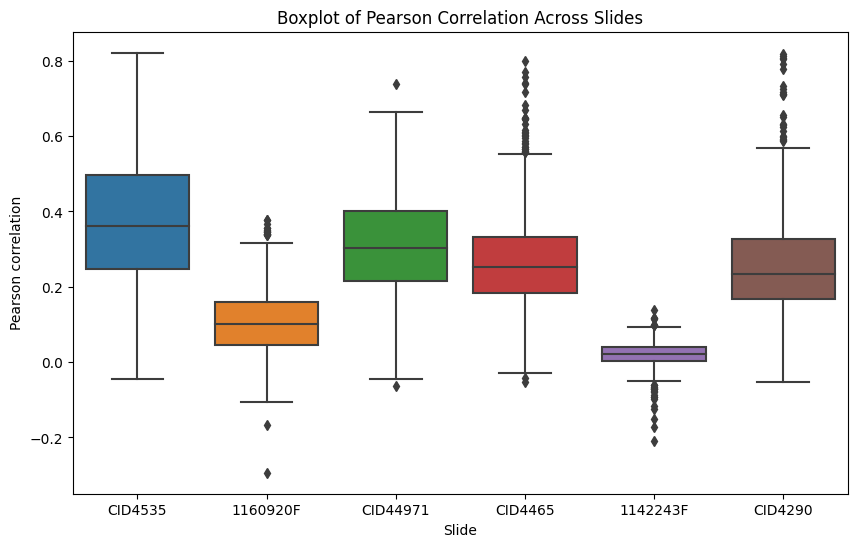

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

plt.figure(figsize=(10, 6))
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides')
gc.collect()
plt.show()

## Combined

In [41]:
import os
import pandas as pd

res1 = os.listdir("./Breast_Cancer/Alex/")
df1 = [pd.read_csv("./Breast_Cancer/Alex/"+i, index_col=[0]) for i in res1]
res2 = os.listdir("./Breast_Cancer/10X/")
df2 = [pd.read_csv("./Breast_Cancer/10X/"+i, index_col=[0]) for i in res2]
df = df1+df2
df = pd.concat(df)
df
    

,Pearson correlation,Gene,Slide,Method
ISG15,0.705595,ISG15,CID4535,Hist2ST
PLA2G2D,0.187361,PLA2G2D,CID4535,Hist2ST
CAMK2N1,0.526289,CAMK2N1,CID4535,Hist2ST
USP48,0.239625,USP48,CID4535,Hist2ST
TCEA3,0.415859,TCEA3,CID4535,Hist2ST
...,...,...,...,...
CYBB,0.122041,CYBB,block2,Hist2ST
ITM2A,0.100643,ITM2A,block2,Hist2ST
SH3BGRL,0.239077,SH3BGRL,block2,Hist2ST
BEX3,0.210675,BEX3,block2,Hist2ST


In [44]:
# Group by 'Slide'
grouped = df.groupby('Slide')

# Find top 20% genes for each slide based on Pearson correlation
result = pd.DataFrame()
top_genes_per_slide = []
for name, group in grouped:
    # Sort genes based on Pearson correlation
    sorted_genes = group.sort_values(by='Pearson correlation', ascending=False)

    # Calculate the index to select the top 20%
    top_20_percent_index = int(0.2 * len(sorted_genes))

    # Select top 20% genes
    top_20_percent_genes = sorted_genes.head(top_20_percent_index)

    # Append the result to the final DataFrame
    result = pd.concat([result, top_20_percent_genes])
    
    # Append the top genes for this slide to the list
    top_genes_per_slide.append(set(top_20_percent_genes['Gene']))

# Find the intersection of top genes across all slides
intersection_genes = set.intersection(*top_genes_per_slide)

# Display the intersection genes
print(f"There are {len(intersection_genes)} predictable genes across Alex and 10x datasets.\nIntersection of Top Genes Across Slides:\n{list(intersection_genes)}")

# Display the result
result


There are 0 predictable genes across Alex and 10x datasets.
Intersection of Top Genes Across Slides:
[]


,Pearson correlation,Gene,Slide,Method
SCGB3A1,0.138953,SCGB3A1,1142243F,Hist2ST
MAGEF1,0.117066,MAGEF1,1142243F,Hist2ST
SNRPG,0.116751,SNRPG,1142243F,Hist2ST
COX17,0.113816,COX17,1142243F,Hist2ST
ITGA6,0.097857,ITGA6,1142243F,Hist2ST
...,...,...,...,...
CPD,0.222698,CPD,block2,Hist2ST
PSME3,0.222623,PSME3,block2,Hist2ST
CPNE3,0.221908,CPNE3,block2,Hist2ST
SNRPA1,0.221004,SNRPA1,block2,Hist2ST


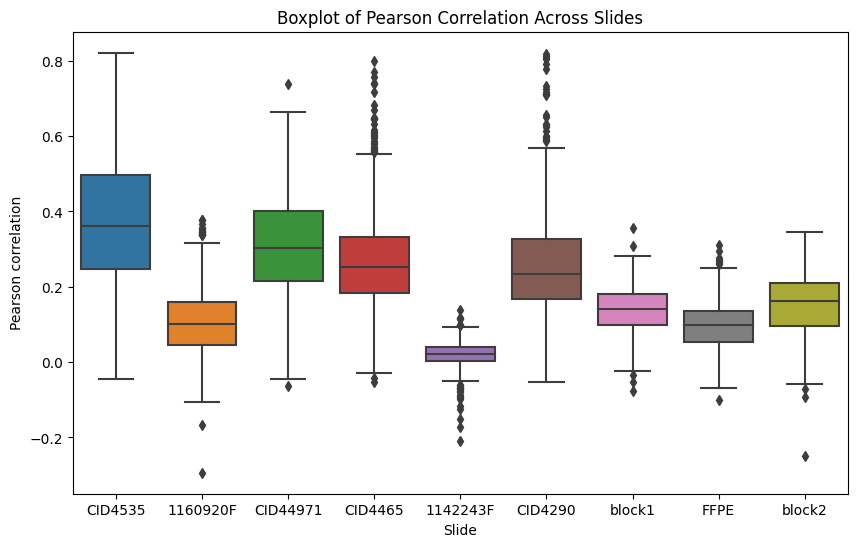

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

plt.figure(figsize=(10, 6))
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides')
gc.collect()
plt.show()